In [14]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/AI/ch08')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#8-1

데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


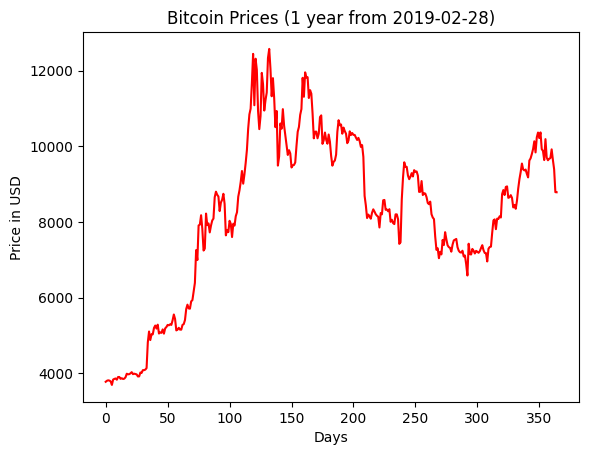

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

# 8-2

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

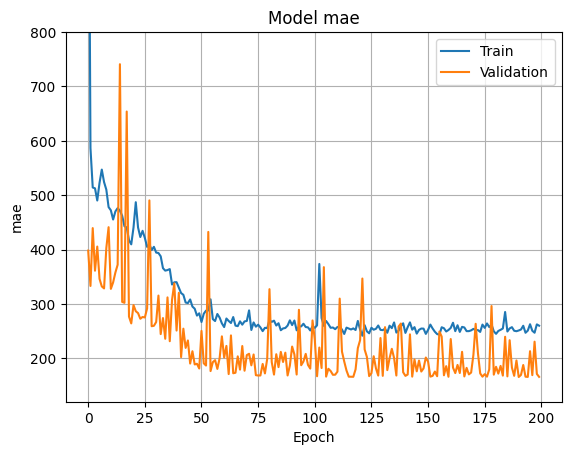

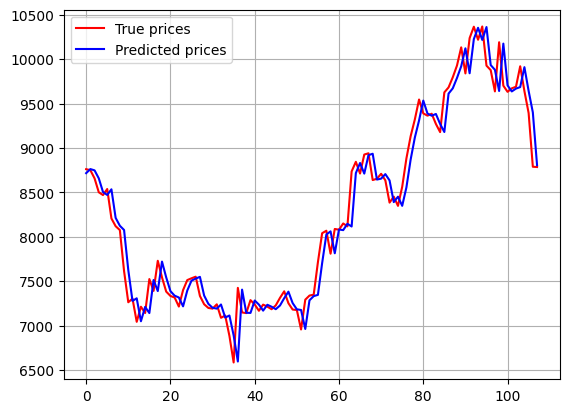

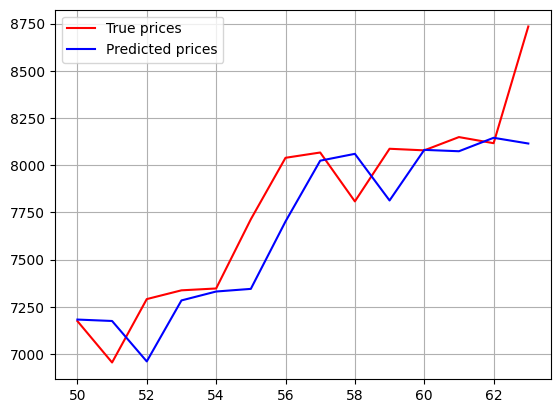

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose='2')

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose='0')
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

#8-3

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

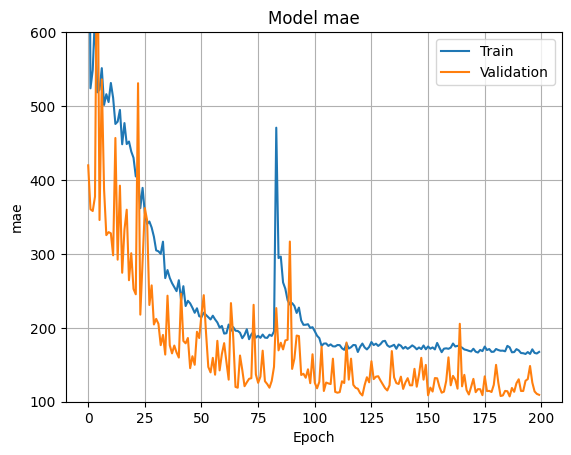

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open("BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() # 종가, 시가, 고가, 저가를 모두 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose='2')

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose='0')
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#8-4


In [ ]:
import music21

# "작은 별" 악보를 ABC 표기로 표현
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
#music21.converter.parse(little_star).show('mid') # 스피커로 연주를 들려줌

import numpy as np

# 계이름과 숫자를 상호 변환하는 표(딕셔너리 자료구조를 사용함)
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
    notes=s.split(' ')[2:]
    seq=[]
    for i in notes:
        seq.append([note2num[i[0]],int(i[1])])
    return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 레이블을 원핫 코드로 변환
def to_onehot(l):
    t=[]
    for i in range(len(l)):
        a=np.zeros(len(onehot))
        a[onehot.index(list(l[i]))]=1.0
        t.append(a)
    return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=8 # 윈도우 크기
h=1 # 수평선 계수

seq=abc2timeseries(little_star)
X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# 훈련 집합 구축
split=int(len(X)*1.0) # 100%를 훈련집합으로 사용
x_train=X[0:split]; y_train=Y[0:split]
y_train=to_onehot(y_train)

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose='2')

# 학습된 모델로 편곡을 하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)
    return timeseries2abc(music)

new_song=arranging_music(model,x_train[0],50)

print(new_song)
#music21.converter.parse(new_song).show('mid')

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoc

#8-5

In [ ]:
import music21

# "작은 별", "봄나들이", "나비야 나비야" 악보를 ABC 표기로 표현
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"

import numpy as np

# 계이름과 숫자를 상호 변환하는 표
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
    notes=s.split(' ')[2:]
    seq=[]
    for i in notes:
        seq.append([note2num[i[0]],int(i[1])])
    return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 레이블을 원핫 코드로 변환
def to_onehot(l):
    t=[]
    for i in range(len(l)):
        a=np.zeros(len(onehot))
        a[onehot.index(list(l[i]))]=1.0
        t.append(a)
    return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=8 # 윈도우 크기
h=1 # 수평선 계수

# 세 곡을 시계열로 변환하고 결합
seq1=abc2timeseries(little_star)
seq2=abc2timeseries(butterfly)
seq3=abc2timeseries(spring_picnic)
seq=seq1+seq2+seq3

X,Y = seq2dataset(seq,w,h)

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM


# 훈련 집합 구축
split=int(len(X)*1.0) # 100%를 훈련집합으로 사용
x_train=X[0:split]; y_train=Y[0:split]
y_train=to_onehot(y_train)

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose='2')

# 학습된 모델로 편곡을 하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)
    return timeseries2abc(music)

new_song=arranging_music(model,x_train[0],50)

print(new_song)
#music21.converter.parse(new_song).show('mid')

Epoch 1/200
116/116 - 2s - loss: 2.6608 - accuracy: 0.2069 - 2s/epoch - 20ms/step
Epoch 2/200
116/116 - 1s - loss: 2.3144 - accuracy: 0.2241 - 604ms/epoch - 5ms/step
Epoch 3/200
116/116 - 1s - loss: 2.2083 - accuracy: 0.2759 - 600ms/epoch - 5ms/step
Epoch 4/200
116/116 - 1s - loss: 2.1893 - accuracy: 0.3103 - 597ms/epoch - 5ms/step
Epoch 5/200
116/116 - 1s - loss: 2.1341 - accuracy: 0.3017 - 591ms/epoch - 5ms/step
Epoch 6/200
116/116 - 1s - loss: 2.0909 - accuracy: 0.3103 - 627ms/epoch - 5ms/step
Epoch 7/200
116/116 - 1s - loss: 2.0681 - accuracy: 0.3017 - 603ms/epoch - 5ms/step
Epoch 8/200
116/116 - 1s - loss: 2.0326 - accuracy: 0.3103 - 583ms/epoch - 5ms/step
Epoch 9/200
116/116 - 1s - loss: 1.9919 - accuracy: 0.2931 - 858ms/epoch - 7ms/step
Epoch 10/200
116/116 - 1s - loss: 1.9936 - accuracy: 0.3362 - 1s/epoch - 10ms/step
Epoch 11/200
116/116 - 1s - loss: 1.9529 - accuracy: 0.3190 - 1s/epoch - 11ms/step
Epoch 12/200
116/116 - 1s - loss: 1.8909 - accuracy: 0.3448 - 589ms/epoch - 5ms/

SubConverterException: ignored

#8-6

In [5]:
import os

# 원본 IMDB 데이터 읽기
directory='data/aclImdb/aclImdb/test'
x=[];y=[]
for c in ['neg','pos']:
    curr=os.path.join(directory,c)
    for fname in os.listdir(curr):
        if fname[-4:]=='.txt':
            f=open(os.path.join(curr,fname),encoding='utf8')
            x.append(f.read())
            y.append(c)
            
print("첫 번째 댓글:",x[0]); print("첫 번째 평가:",y[0])
print("마지막 댓글:",x[-1]); print("마지막 평가:",y[-1])

첫 번째 댓글: people, get a clue! I mean, the writers dont have one, so I would expect you to...this show is SUCH a pale imitation of the '60 show that you can laugh at it! and the sixties show is the one with the cheap special effects, and is in B&W fer Chrissakes! Yet the mood and the writing on the old show is MILES ahead of this drivel. Get HiP kids! if 98 Degrees or Brittany told you to watch it, you would! You know it! Just bypass them and tell all your friends you were 'IN' with the 'scene' BEFORE it became too cool!
첫 번째 평가: neg
마지막 댓글: I've seen many Dustin Hoffman's movies like Straw Dogs or Rain Man and I liked them, but his characters are much to often calm or even shy persons. I expected him to be in this movie the same as he was in Straw Dogs, but I saw a totally different person. He was much more energetic in this film and kinda reminded me of Al Pacino in Serpico. The movie was very interesting from beginning to the end. I liked the way Dustin Hoffman's character was ready t

#8-7

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 

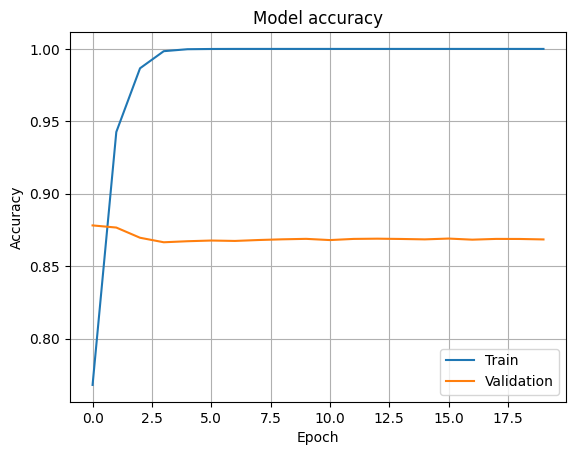

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id=imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}

for i in range(1,21):
    print(id2word[i],end='/')
    
embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

# 신경망 모델 설계와 학습
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#8-8


Epoch 1/20
313/313 - 46s - loss: 0.4774 - accuracy: 0.7757 - val_loss: 0.3258 - val_accuracy: 0.8690 - 46s/epoch - 148ms/step
Epoch 2/20
313/313 - 26s - loss: 0.2584 - accuracy: 0.9014 - val_loss: 0.3073 - val_accuracy: 0.8718 - 26s/epoch - 84ms/step
Epoch 3/20
313/313 - 17s - loss: 0.1883 - accuracy: 0.9308 - val_loss: 0.3289 - val_accuracy: 0.8800 - 17s/epoch - 54ms/step
Epoch 4/20
313/313 - 13s - loss: 0.1579 - accuracy: 0.9459 - val_loss: 0.3876 - val_accuracy: 0.8260 - 13s/epoch - 41ms/step
Epoch 5/20
313/313 - 13s - loss: 0.1577 - accuracy: 0.9430 - val_loss: 0.3505 - val_accuracy: 0.8690 - 13s/epoch - 42ms/step
Epoch 6/20
313/313 - 11s - loss: 0.1177 - accuracy: 0.9586 - val_loss: 0.4514 - val_accuracy: 0.8658 - 11s/epoch - 36ms/step
Epoch 7/20
313/313 - 7s - loss: 0.0853 - accuracy: 0.9718 - val_loss: 0.4350 - val_accuracy: 0.8722 - 7s/epoch - 24ms/step
Epoch 8/20
313/313 - 9s - loss: 0.0698 - accuracy: 0.9771 - val_loss: 0.4565 - val_accuracy: 0.8696 - 9s/epoch - 30ms/step
정확률

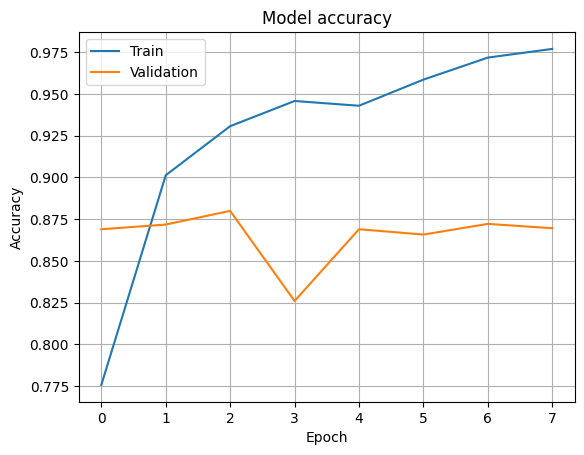

In [7]:
from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)

embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

#8-9

<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['oak', 'pine

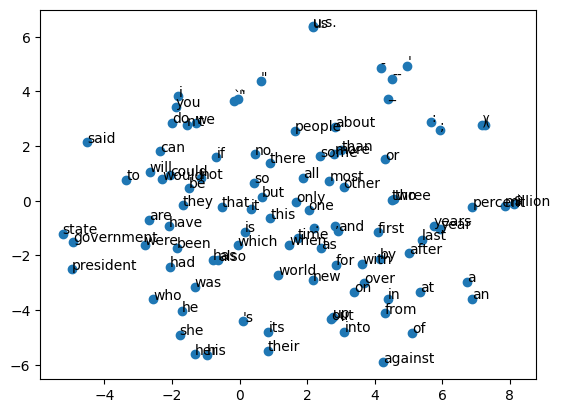

In [16]:
import os
import numpy as np
from scipy.spatial import distance

# IMDB 원본 데이터 읽기
fname='glove.6B/glove.6B.100d.txt'
f=open(fname,encoding='utf8')

for line in f: # 내용을 살필 목적으로 첫 번째 단어만 출력
    print(type(line))
    print(line)
    break

# 사전 구축(딕셔너리 자료구조로 표현)
dictionary={}
for line in f:
    li=line.split()
    word=li[0]
    vector=np.asarray(li[1:],dtype='float32')
    dictionary[word]=vector

# 가장 가까운 단어를 찾아주는 함수
def find_closest_words(vector):
    return sorted(dictionary.keys(), key=lambda w: distance.euclidean(dictionary[w],vector))

# 가까운 단어 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['oak'])[:5])

# 단어 추론
print(find_closest_words(dictionary["seoul"]-dictionary["korea"]+dictionary["spain"])[:5])
print(find_closest_words(dictionary["animal"]-dictionary["lion"]+dictionary["oak"])[:5])
print(find_closest_words(dictionary["queen"]-dictionary["king"]+dictionary["actress"])[:5])

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# tsne를 이용하여 2차원 공간으로 축소하고 시각화
tsne=TSNE(n_components=2,random_state=0)
words=list(dictionary.keys())
vectors=np.array([dictionary[word] for word in words])
p2=tsne.fit_transform(vectors[:100])
plt.scatter(p2[:,0],p2[:,1])

for label,x,y in zip(words,p2[:,0],p2[:,1]):
    plt.annotate(label,xy=(x,y))